# AutoMM for Image Classification - Quick Start

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/autogluon/autogluon/blob/stable/docs/tutorials/multimodal/image_prediction/beginner_image_cls.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/autogluon/autogluon/blob/stable/docs/tutorials/multimodal/image_prediction/beginner_image_cls.ipynb)



In this quick start, we'll use the task of image classification to illustrate how to use **MultiModalPredictor**. Once the data is prepared in [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) format, a single call to `MultiModalPredictor.fit()` will take care of the model training for you.


## Create Image Dataset

For demonstration purposes, we use a subset of the [Shopee-IET dataset](https://www.kaggle.com/competitions/demo-shopee-iet-competition/data) from Kaggle.
Each image in this data depicts a clothing item and the corresponding label specifies its clothing category.
Our subset of the data contains the following possible labels: `BabyPants`, `BabyShirt`, `womencasualshoes`, `womenchiffontop`.

We can load a dataset by downloading a url data automatically:

In [1]:
!pip install autogluon.multimodal


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

from autogluon.multimodal.utils.misc import shopee_dataset
download_dir = './ag_automm_tutorial_imgcls'
train_data_path, test_data_path = shopee_dataset(download_dir)
print(train_data_path)

100%|██████████| 84.0M/84.0M [00:05<00:00, 15.1MiB/s]


                                                 image  label
0    c:\Users\Anthony\Desktop\Grad School\CMPE 255\...      0
1    c:\Users\Anthony\Desktop\Grad School\CMPE 255\...      0
2    c:\Users\Anthony\Desktop\Grad School\CMPE 255\...      0
3    c:\Users\Anthony\Desktop\Grad School\CMPE 255\...      0
4    c:\Users\Anthony\Desktop\Grad School\CMPE 255\...      0
..                                                 ...    ...
795  c:\Users\Anthony\Desktop\Grad School\CMPE 255\...      3
796  c:\Users\Anthony\Desktop\Grad School\CMPE 255\...      3
797  c:\Users\Anthony\Desktop\Grad School\CMPE 255\...      3
798  c:\Users\Anthony\Desktop\Grad School\CMPE 255\...      3
799  c:\Users\Anthony\Desktop\Grad School\CMPE 255\...      3

[800 rows x 2 columns]


We can see there are 800 rows and 2 columns in this training dataframe. The 2 columns are **image** and **label**, and the **image** column contains the absolute paths of the images. Each row represents a different training sample.

In addition to image paths, `MultiModalPredictor` also supports image bytearrays during training and inference. We can load the dataset with bytearrays with the option `is_bytearray` set to `True`:

In [3]:
import warnings
warnings.filterwarnings('ignore')

download_dir = './ag_automm_tutorial_imgcls'
train_data_byte, test_data_byte = shopee_dataset(download_dir, is_bytearray=True)

## Use AutoMM to Fit Models

Now, we fit a classifier using AutoMM as follows:

In [4]:
from autogluon.multimodal import MultiModalPredictor
import uuid
model_path = f"./tmp/{uuid.uuid4().hex}-automm_shopee"
predictor = MultiModalPredictor(label="label", path=model_path)
predictor.fit(
    train_data=train_data_path,
    time_limit=30, # seconds
)

=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          24
Pytorch Version:    2.3.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       10.55 GB / 31.91 GB (33.1%)
Disk Space Avail:   55.72 GB / 464.51 GB (12.0%)
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	4 unique label values:  [0, 1, 2, 3]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir c:\Users\Anthony\Deskto

model.safetensors:   0%|          | 0.00/395M [00:00<?, ?B/s]

GPU Count: 0
GPU Count to be Used: 0

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name              | Type                            | Params | Mode 
------------------------------------------------------------------------------
0 | model             | TimmAutoModelForImagePrediction | 95.7 M | train
1 | validation_metric | MulticlassAccuracy              | 0      | train
2 | loss_func         | CrossEntropyLoss                | 0      | train
------------------------------------------------------------------------------
95.7 M    Trainable params
0         Non-trainable params
95.7 M    Total params
382.772   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Time limit reached. Elapsed time is 0:00:34. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("c:\Users\Anthony\Desktop\Grad School\CMPE 255\Notebooks\tmp\a873abf5c17d466b895b82ab5ce971f8-automm_shopee")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




**label** is the name of the column that contains the target variable to predict, e.g., it is "label" in our example. **path** indicates the directory where models and intermediate outputs should be saved. We set the training time limit to 30 seconds for demonstration purpose, but you can control the training time by setting configurations. To customize AutoMM, please refer to [Customize AutoMM](../advanced_topics/customization.ipynb).


## Evaluate on Test Dataset

You can evaluate the classifier on the test dataset to see how it performs, the test top-1 accuracy is:

In [5]:
scores = predictor.evaluate(test_data_path, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: |          | 0/? [00:00<?, ?it/s]

Top-1 test acc: 0.100


You can also evaluate on test data with image bytearray using the model trained on training data with image path, and vice versa:

In [6]:
scores = predictor.evaluate(test_data_byte, metrics=["accuracy"])
print('Top-1 test acc: %.3f' % scores["accuracy"])

Predicting: |          | 0/? [00:00<?, ?it/s]

Top-1 test acc: 0.100


## Predict on a New Image

Given an example image, let's visualize it first,

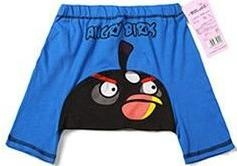

In [7]:
image_path = test_data_path.iloc[0]['image']
from IPython.display import Image, display
pil_img = Image(filename=image_path)
display(pil_img)

We can easily use the final model to `predict` the label,

In [8]:
predictions = predictor.predict({'image': [image_path]})
print(predictions)

Predicting: |          | 0/? [00:00<?, ?it/s]

[2]


If probabilities of all categories are needed, you can call `predict_proba`:

In [9]:
proba = predictor.predict_proba({'image': [image_path]})
print(proba)

Predicting: |          | 0/? [00:00<?, ?it/s]

[[0.24008915 0.24951345 0.2777596  0.23263778]]


Similarly as `predictor.evaluate`, we can also parse image_bytearrays into `.predict` and `.predict_proba`:

In [10]:
image_byte = test_data_byte.iloc[0]['image']
predictions = predictor.predict({'image': [image_byte]})
print(predictions)

proba = predictor.predict_proba({'image': [image_byte]})
print(proba)

Predicting: |          | 0/? [00:00<?, ?it/s]

[2]


Predicting: |          | 0/? [00:00<?, ?it/s]

[[0.24008915 0.24951345 0.2777596  0.23263778]]


## Extract Embeddings

Extracting representation from the whole image learned by a model is also very useful. We provide `extract_embedding` function to allow predictor to return the N-dimensional image feature where `N` depends on the model(usually a 512 to 2048 length vector)

In [11]:
feature = predictor.extract_embedding({'image': [image_path]})
print(feature[0].shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(768,)


You should expect the same result when extract embedding from image bytearray:

In [12]:
feature = predictor.extract_embedding({'image': [image_byte]})
print(feature[0].shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(768,)


## Save and Load

The trained predictor is automatically saved at the end of `fit()`, and you can easily reload it.

```{warning}

`MultiModalPredictor.load()` uses `pickle` module implicitly, which is known to be insecure. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling. Never load data that could have come from an untrusted source, or that could have been tampered with. **Only load data you trust.**

```

In [13]:
loaded_predictor = MultiModalPredictor.load(model_path)
load_proba = loaded_predictor.predict_proba({'image': [image_path]})
print(load_proba)

ValueError: Resuming checkpoint 'c:\Users\Anthony\Desktop\Grad School\CMPE 255\Notebooks\tmp\a873abf5c17d466b895b82ab5ce971f8-automm_shopee\last.ckpt' and final checkpoint 'c:\Users\Anthony\Desktop\Grad School\CMPE 255\Notebooks\tmp\a873abf5c17d466b895b82ab5ce971f8-automm_shopee\model.ckpt' both don't exist. Consider starting training from scratch.

We can see the predicted class probabilities are still the same as above, which means same model!

## Other Examples

You may go to [AutoMM Examples](https://github.com/autogluon/autogluon/tree/master/examples/automm) to explore other examples about AutoMM.

## Customization
To learn how to customize AutoMM, please refer to [Customize AutoMM](../advanced_topics/customization.ipynb).